  <h2>Wczytywanie bibliotek</h2>

In [1]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
import os

random.seed(42)


In [2]:
train = pd.read_csv('D:/05-Szkola/dane_inz/UNSW_NB15_training-set.csv')
test = pd.read_csv('D:/05-Szkola/dane_inz/UNSW_NB15_testing-set.csv')


In [3]:
data = pd.concat([train,test]).reset_index(drop=True)
#leaving only normal and DoS data
data = data[data['attack_cat'].isin(['Normal', 'DoS'])]
cols_cat = data.select_dtypes('object').columns 
cols_numeric = data._get_numeric_data().columns 


In [4]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,109353.000000,109353.000000,109353.000000,109353.000000,1.093530e+05,1.093530e+05,1.093530e+05,109353.000000,109353.000000,1.093530e+05,...,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000
mean,46356.251900,1.229760,27.047872,31.266970,6.226179e+03,2.548154e+04,3.851711e+04,115.223606,77.496411,4.376300e+07,...,1.830878,1.290564,4.008596,0.012263,0.012336,0.137637,4.026977,5.366007,0.033634,0.149543
std,32861.363364,5.762437,106.350786,150.418904,1.211829e+05,1.992933e+05,1.134210e+05,107.352027,100.800574,1.745830e+08,...,2.306730,1.608228,5.334296,0.110224,0.111043,0.615860,4.152302,5.484808,0.180287,0.356625
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,23767.000000,0.001036,2.000000,2.000000,2.000000e+02,8.600000e+01,2.865123e+01,31.000000,29.000000,1.151318e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,37436.000000,0.037116,10.000000,8.000000,8.640000e+02,3.540000e+02,1.396927e+03,31.000000,29.000000,4.502699e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000
75%,71429.000000,0.710897,22.000000,18.000000,2.558000e+03,3.380000e+03,4.681497e+03,254.000000,60.000000,1.737126e+06,...,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,5.000000,7.000000,0.000000,0.000000
max,175249.000000,59.999989,8669.000000,11018.000000,1.163118e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.344000e+09,...,46.000000,46.000000,63.000000,2.000000,2.000000,16.000000,47.000000,62.000000,1.000000,1.000000


In [5]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
#sprawdzanie i usuwanie brakujach wartosci
print(data.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<Axes: >

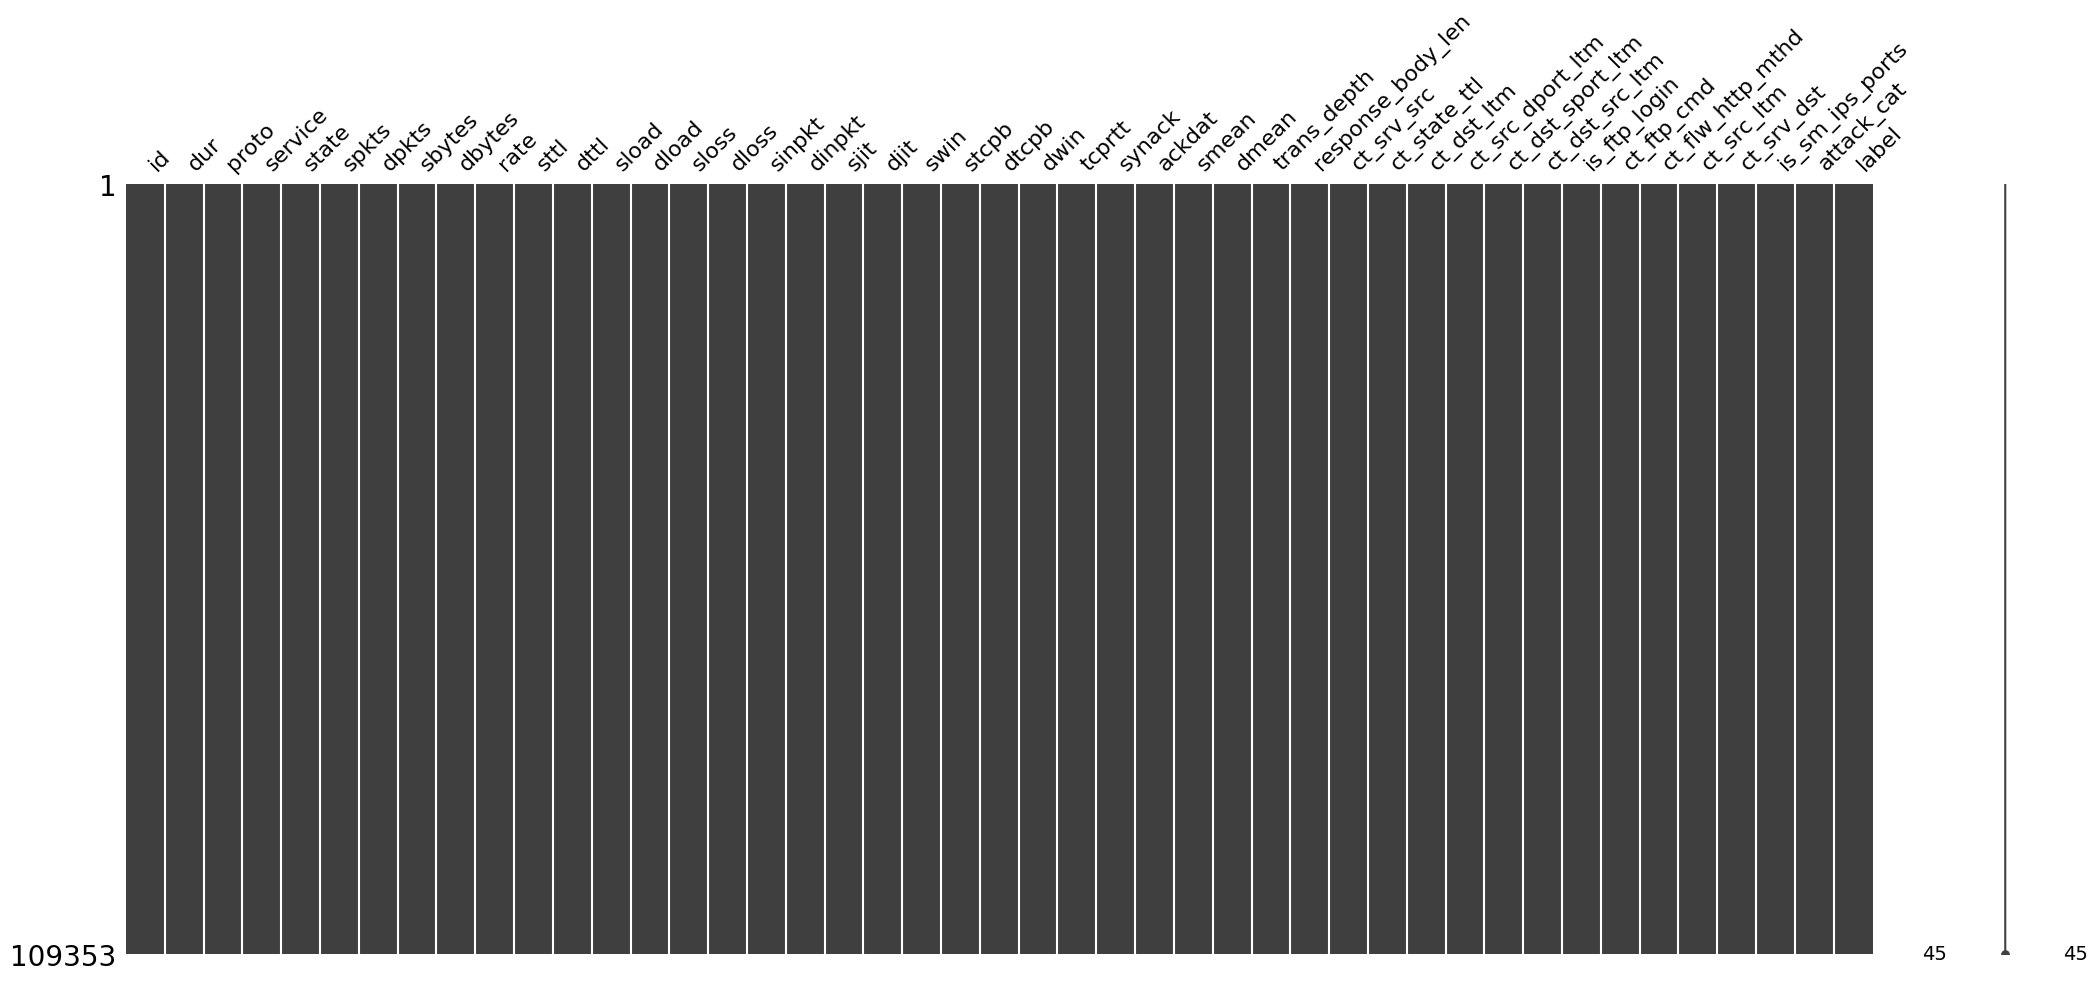

In [7]:
missingno.matrix(data)

<h3>sprawdzamy naglowki tabel</h3>

In [8]:
data['proto'].unique()


array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'ip', 'ipnip', 'st2', 'argus',
       'egp', 'nvp', 'pup', 'mux', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'mfe-nsp', 'merit-inp',
       '3pc', 'ddp', 'idpr-cmtp', 'tp++', 'sdrp', 'ipv6-frag',
       'ipv6-route', 'idrp', 'gre', 'mhrp', 'i-nlsp', 'rvd', 'mobile',
       'narp', 'skip', 'sctp', 'ipv6-no', 'ipv6-opts', 'sat-expak',
       'ippc', 'kryptolan', 'any', 'sat-mon', 'cpnx', 'wsn', 'pvp',
       'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'nsfnet-igp',
       'dgp', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d', 'pri-enc',
       'gmtp', 'ifmp', 'pnni', 'ggp', 'cbt', 'bbn-rcc', 'emcon', 'igp',
       'xnet', 'dcn', 'bna', 'swipe', 'chaos', 'cftp', 'visa', 'ipcv',
       'cphb', 'iso-tp4', 'netblt', 'wb-expak', 'sep', 'secure-vmtp',
       'vines', 'il', 'eigrp', 'tcf', 'sprite-rpc', 'tlsp', 'unas', 'rdp',
       'idpr', 'ipv6', 'rsvp', 'iso-ip', 'micp', 'encap', 'etherip',
       'pim', 'ar

In [9]:
data['service'].unique() 
data['service']= np.where(data['service'] == '-', 'None', data['service'])
print(data['service'].unique())

['None' 'http' 'snmp' 'smtp' 'pop3' 'ftp' 'ftp-data' 'dns' 'ssl' 'dhcp'
 'irc' 'ssh' 'radius']


In [10]:
data['state'].unique()


array(['INT', 'FIN', 'REQ', 'CON', 'RST', 'ACC', 'ECO', 'PAR', 'URN',
       'no'], dtype=object)

In [11]:
print(data['sttl'].dtype)
data['sttl'] = pd.to_numeric(data['sttl'], errors='coerce')


int64


<h3>usuwamy puste wartosci</h3>

In [12]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', 'None', data[col])
    return data


In [13]:
cols = data.columns
data_bin = Remove_dump_values(data, cols)


In [14]:
data_bin = data_bin.drop(['id'], axis=1) 
data_bin.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])
data_bin_hot = pd.get_dummies(data_bin,columns=cols_cat)
data_bin_hot.shape


(109353, 196)

In [15]:
data_bin_hot.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.1e-05,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,8e-06,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,5e-06,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,6e-06,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,1e-05,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False


<h3> Normalizowanie wartosci</h3>

In [16]:
cols_numeric = list(cols_numeric)
cols_numeric.remove('label')
cols_numeric.remove('id')


In [17]:
data_bin_hot[cols_numeric] = data_bin_hot[cols_numeric].astype('float') 


In [18]:
data_bin_hot[cols_numeric] = (data_bin_hot[cols_numeric] - np.min(data_bin_hot[cols_numeric])) / np.std(data_bin_hot[cols_numeric])


In [19]:
data_bin_hot.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.908923e-06,0.018806,0.0,0.004093,0.0,0.801523,2.366058,0.0,1.033116,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1.388308e-06,0.018806,0.0,0.014540,0.0,1.102094,2.366058,0.0,5.046333,0.0,...,False,False,False,False,True,False,False,False,False,False
2,8.676924e-07,0.018806,0.0,0.008813,0.0,1.763350,2.366058,0.0,4.893969,0.0,...,False,False,False,False,True,False,False,False,False,False
3,1.041231e-06,0.018806,0.0,0.007427,0.0,1.469459,2.366058,0.0,3.436776,0.0,...,False,False,False,False,True,False,False,False,False,False
4,1.735385e-06,0.018806,0.0,0.017544,0.0,0.881675,2.366058,0.0,4.871057,0.0,...,False,False,False,False,True,False,False,False,False,False


<h3>Sprawdzanie waznosci poszczegolnych zmiennych</h3>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = data_bin_hot.drop('label', axis=1)
y = data_bin_hot['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [21]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter search space
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
# }

# # Initialize a RandomForest classifier
# clf = RandomForestClassifier()

# # Initialize a GridSearchCV object
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Record the start time
# start_time = time.time()

# # Fit the training data to the model using GridSearchCV
# grid_search.fit(X_train, y_train)

# # Record the end time
# end_time = time.time()

# # Calculate the time taken for the model to learn
# time_taken = end_time - start_time
# print(f"Time taken to learn: {time_taken} seconds")


In [22]:
# #Showing the best parameters 
# best_params = grid_search.best_params_
# print("Najlepsze parametry:")
# print(best_params)


<h3> Zapisanie najlepszych parametrów do pliku <h3>

In [23]:
# best_params = grid_search.best_params_

# # saving best par to file
# with open("best_params.pkl", "wb") as f:
#     pickle.dump(best_params, f)
    

NameError: name 'grid_search' is not defined

In [24]:
# loading best parapeters from file 
with open("best_params.pkl", "rb") as f:
    best_params = pickle.load(f)

# Creating and training model with best parameters
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, n_estimators=500)

In [25]:
from sklearn.metrics import accuracy_score

# Predicting types of attack for testing data 
y_pred = best_clf.predict(X_test)

#calculating accuracy of model 
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu:", accuracy)


Dokładność modelu: 0.9937359974395318


In [26]:
# Get the feature importances
importances = best_clf.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

# Print the top 15 most important features
for i in range(15):
    index = sorted_indices[i]
    print(f"{X.columns[index]}: {importances[index]}")
    

smean: 0.07219091092186607
proto_udp: 0.0718126269289842
sload: 0.07091396171769226
sbytes: 0.07046272261768163
rate: 0.050804864573236894
dbytes: 0.04050288139618049
state_INT: 0.036139730855691
dur: 0.033031705197195865
sttl: 0.03234689252808617
ct_dst_sport_ltm: 0.032147909798902155
ct_srv_dst: 0.030663624156557746
dload: 0.02957491977542982
proto_unas: 0.02764478869918476
ct_dst_src_ltm: 0.026897766735018716
dpkts: 0.026753066181189358


<h3>Pokazujemy 10 najwazniejszych kolumn, jeżeli chodzi o atak DoS na podstawie metody RandomForestClassifier</h3>

<h3>Pokazujemy 10 najwazniejszych kolumn, jeżeli chodzi o atak DoS na podstawie metody permutation_importance</h3>

In [27]:
from sklearn.inspection import permutation_importance
# Calculate the permutation importance
result = permutation_importance(best_clf, X_test, y_test, n_repeats=10, random_state=0)

# Sort the features by importance
sorted_indices = result.importances_mean.argsort()[::-1]

# Print the top 15 most important features
for i in range(15):
    index = sorted_indices[i]
    print(f"{X.columns[index]}: {result.importances_mean[index]}")

proto_udp: 0.014356910978007408
ct_srv_dst: 0.0016368707420785222
sbytes: 0.0013808239220886032
dbytes: 0.0011796442778108096
ct_dst_src_ltm: 0.0010973435142426213
sttl: 0.0009464587810342207
response_body_len: 0.0005715330803346408
smean: 0.0004938045814091296
dmean: 0.0004709432581957551
ct_srv_src: 0.00044350967033968125
dttl: 0.0003657811714141701
service_http: 0.00018289058570708505
ct_flw_http_mthd: 0.00017831832106440793
trans_depth: 0.0001554569978510223
proto_igmp: 0.0001371679392803138


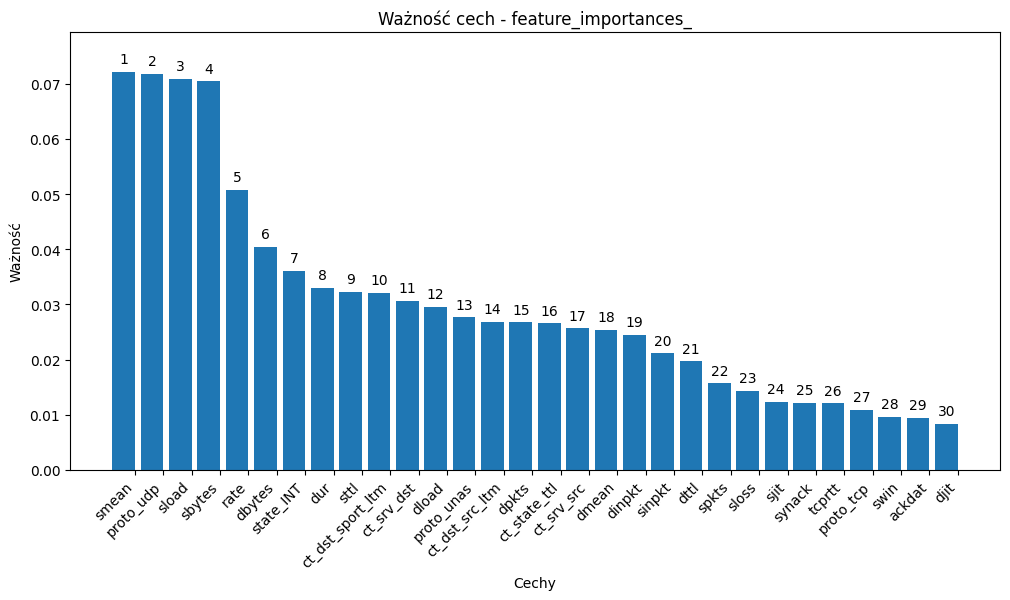

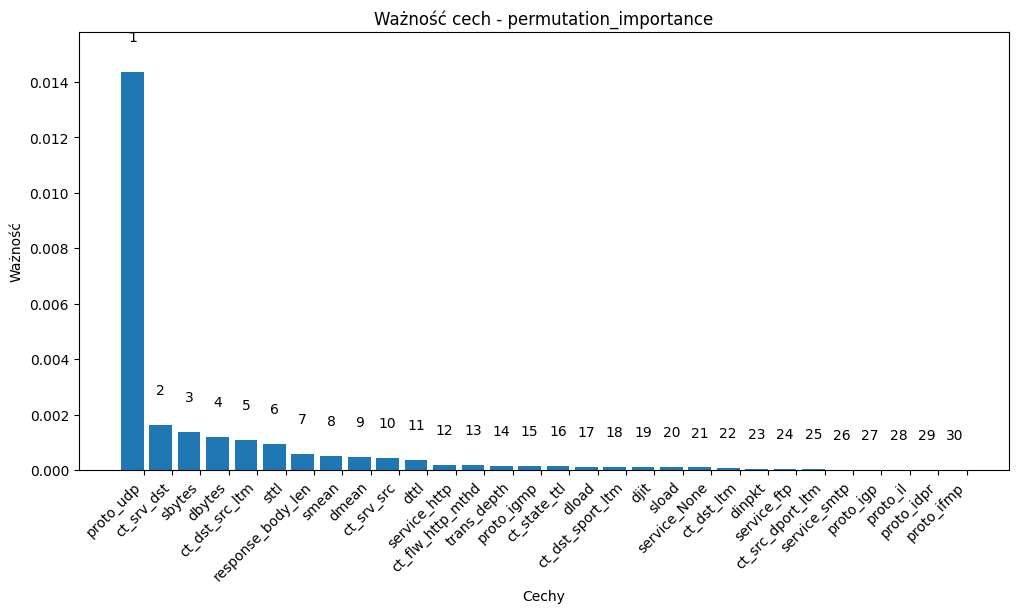

In [28]:
def plot_feature_importances(importances, feature_names, title, top_n=20):
    sorted_indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
    offset = 0.4  #moving labels to the rigth
    plt.xticks([i + offset for i in range(len(sorted_indices))], [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
    plt.xlabel("Cechy")
    plt.ylabel("Ważność")
    plt.title(title)
    plt.subplots_adjust(bottom=0.15)
    
    max_importance = np.max(importances[sorted_indices])
    plt.ylim(0, max_importance * 1.1)  # Dodaj 10% marginesu na górze wykresu

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, str(i + 1), ha='center', va='bottom')

    plt.show()

# Ważność cech z atrybutu feature_importances_
plot_feature_importances(importances, X.columns, "Ważność cech - feature_importances_", top_n=30)

# Ważność cech z metody permutacji
plot_feature_importances(result.importances_mean, X.columns, "Ważność cech - permutation_importance", top_n=30)